In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import gymnasium as gym
import numpy as np

import matplotlib.pyplot as plt

import utils
import agents
import models
import datasets
import optimizers

In [3]:
utils.set_random_seed(42)

In [4]:
model_path = os.path.join(utils.MODEL_DIR, 'test.pt')
data_path = os.path.join(utils.EXP_DIR, 'test.pkl')

In [5]:
env_name = 'CartPole-v1'
env = gym.make(env_name)

In [6]:
n_obs_dims, n_act_dims, discrete = utils.get_env_dims(env)

collect random trajectories to train initial model

In [7]:
agent = agents.RandomAgent(env)

In [8]:
dataset = datasets.ExpDataset()

In [9]:
n_episodes = 10
for i in range(n_episodes):
    traj = utils.run_episode(env, agent, max_n_steps=1000, render=False)
    dataset.put(traj)
    rtn = sum(x[2] for x in traj)
    print(i, rtn)

0 25.0
1 24.0
2 18.0
3 14.0
4 22.0
5 14.0
6 22.0
7 15.0
8 22.0
9 36.0


train initial model

In [10]:
model = models.UDRLNeuralProcess(
    n_obs_dims=n_obs_dims,
    n_act_dims=n_act_dims,
    n_emb_dims=32,
    discrete=discrete,
    emb_layer_kwargs={'n_layers': 2, 'layer_size': 64},
    pred_layer_kwargs={'n_layers': 2, 'layer_size': 64}
)

In [11]:
optimizer = optimizers.UDRLNeuralProcessOptimizer(
    model,
    dataset,
    batch_size=256,
    opt_kwargs={'lr': 1e-3}
)

In [12]:
dataset.split()

In [13]:
model.reset()

In [14]:
optimizer.train(n_epochs=100, verbose=True)

epoch: 0
train pred loss: 0.697417
val pred loss: 0.689745

epoch: 1
train pred loss: 0.695489
val pred loss: 0.688957

epoch: 2
train pred loss: 0.694041
val pred loss: 0.688605

epoch: 3
train pred loss: 0.693028
val pred loss: 0.688661

epoch: 4
train pred loss: 0.692383
val pred loss: 0.688981

epoch: 5
train pred loss: 0.691980
val pred loss: 0.689412

epoch: 6
train pred loss: 0.691693
val pred loss: 0.689753

epoch: 7
train pred loss: 0.691386
val pred loss: 0.690094

epoch: 8
train pred loss: 0.691063
val pred loss: 0.690314

epoch: 9
train pred loss: 0.690743
val pred loss: 0.690535

epoch: 10
train pred loss: 0.690405
val pred loss: 0.690698

epoch: 11
train pred loss: 0.690080
val pred loss: 0.690686

epoch: 12
train pred loss: 0.689725
val pred loss: 0.690719

epoch: 13
train pred loss: 0.689364
val pred loss: 0.690729

epoch: 14
train pred loss: 0.688991
val pred loss: 0.690803

epoch: 15
train pred loss: 0.688624
val pred loss: 0.691010

epoch: 16
train pred loss: 0.68826

train online

In [15]:
agent = agents.UDRLNeuralProcessAgent(
    model, 
    dataset, 
    optimizer, 
    train_freq=1,
    train_kwargs={'n_epochs': 100, 'verbose': False}
)

In [16]:
agent.training = True

In [17]:
n_episodes = 100
for i in range(n_episodes):
    traj = utils.run_episode(env, agent, max_n_steps=1000, render=False)
    rtn = sum(x[2] for x in traj)
    print(i, rtn)

0 30.0
1 44.0
2 54.0
3 36.0
4 44.0
5 67.0
6 41.0
7 37.0
8 43.0
9 166.0
10 52.0
11 50.0
12 87.0
13 107.0
14 100.0
15 119.0
16 124.0
17 116.0
18 96.0
19 125.0
20 145.0
21 114.0
22 128.0
23 168.0
24 129.0
25 154.0
26 96.0
27 141.0
28 105.0
29 130.0
30 153.0
31 43.0
32 105.0
33 56.0
34 186.0
35 223.0
36 98.0
37 128.0
38 224.0
39 500.0
40 60.0
41 158.0
42 500.0
43 180.0
44 350.0
45 140.0
46 227.0
47 230.0
48 289.0
49 34.0
50 430.0
51 500.0
52 448.0
53 145.0
54 451.0
55 500.0
56 435.0
57 470.0
58 362.0
59 500.0


KeyboardInterrupt: 

In [18]:
returns = [dataset.returns[idxes[0]] for idxes in dataset.idxes_of_traj]

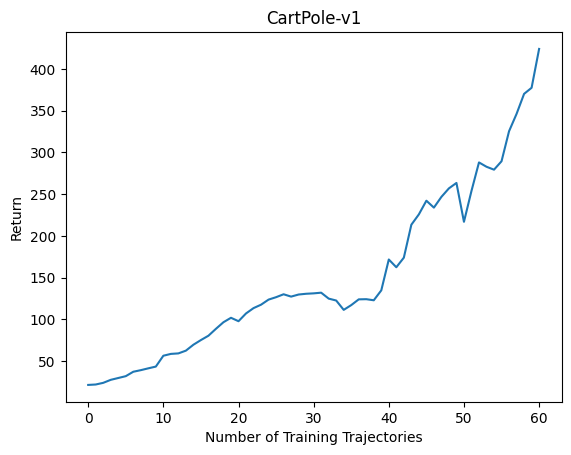

In [19]:
plt.title(env_name)
plt.xlabel('Number of Training Trajectories')
plt.ylabel('Return')
plt.plot(utils.smooth(returns, win=10))
plt.show()